<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [49]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [7]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [10]:
# Answer:
average_duration = movies.loc[:, 'duration'].mean()
print(average_duration)

120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [11]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

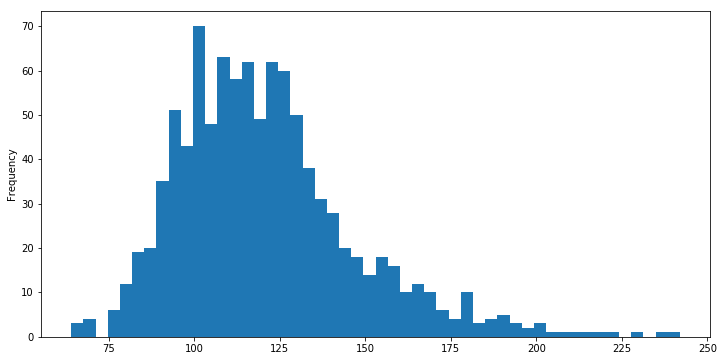

In [66]:
# Answer:
fig, ax = plt.subplots(figsize=(12, 6))
movies.loc[:, 'duration'].plot(kind='hist', bins=50, ax=ax);

#less than 20 was not enough and more than 100 seemed like too much

#### Use a box plot to display that same data.

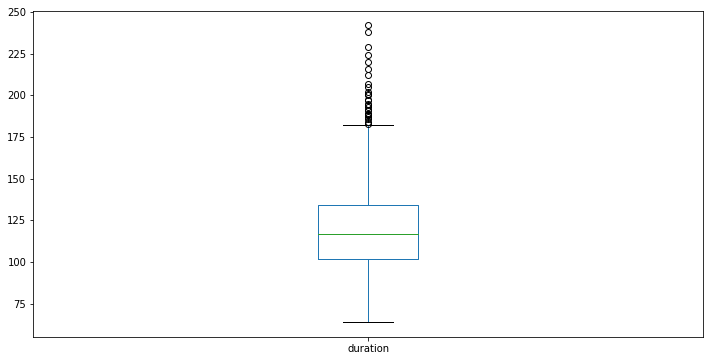

In [65]:
# Answer:
fig, ax = plt.subplots(figsize=(12, 6))
movies.loc[:, 'duration'].plot(kind='box', ax=ax);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [37]:
# Answer:

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Number of Ratings')

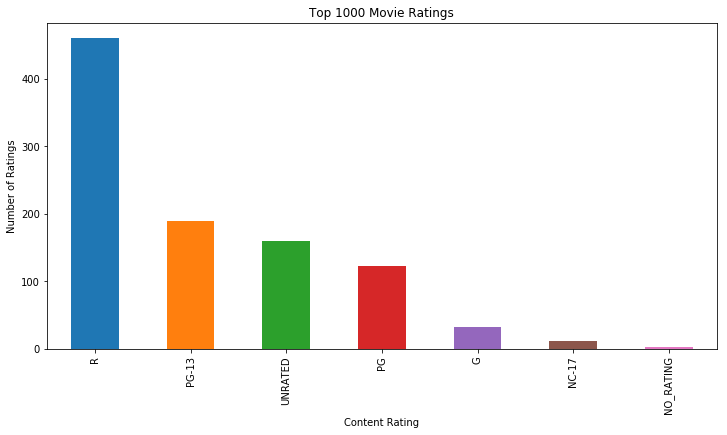

In [111]:
# Answer:
ratings_count = movies.content_rating.value_counts()
#define variable ratings_count 
fig, ax = plt.subplots(figsize=(12,6))
ratings_count.plot(kind='bar', title = 'Top 1000 Movie Ratings', ax=ax);
plt.xlabel('Content Rating')
plt.ylabel('Number of Ratings')
#name of x and y axis

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [50]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
#be sure to test before putting inplace=True


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [53]:
# Answer:
#be sure to test before putting inplace=True
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

#### Count the number of missing values in each column.

In [56]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [60]:
# Answer:
movies.fillna('NO_RATING', inplace=True)
#NO_RATING used to replace all no ratings

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [61]:
# Answer:
more_than_2 = movies[movies.duration >= 120].star_rating.mean()
less_than_2 = movies[movies.duration < 120].star_rating.mean()
#since 120 duration is in minues use 120 minutes or 2 hours

print(less_than_2)
print(more_than_2)
#use print to ensure values make sense

7.838666666666657
7.948898678414082


#### Use a visualization to detect whether there is a relationship between duration and star rating.

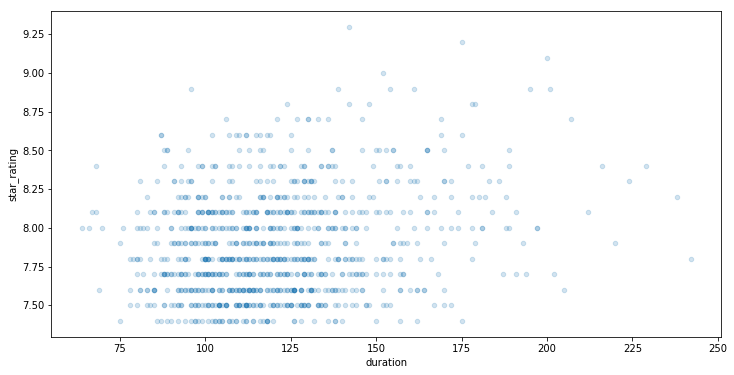

In [74]:
# Answer:
fig, ax = plt.subplots(figsize = (12,6))
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2, ax=ax);

#there does not seem to be a relationshup between ratings an movie length

#### Calculate the average duration for each genre.

In [75]:
# Answer:
movies.groupby('genre').duration.mean()
#groupby to isolate genre and .mean() to find average of duration

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

C:\Users\Kevin\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2166: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


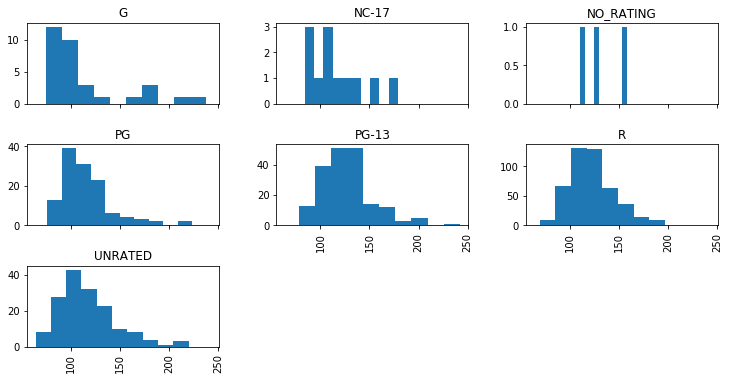

In [86]:
# Answer:
fig, ax = plt.subplots(figsize=(12,6))
movies.hist(column='duration', by='content_rating', sharex=True, ax=ax);
#I was not able to remove the pink text below
#this option does not tell a very good story of the data and likely would not be used

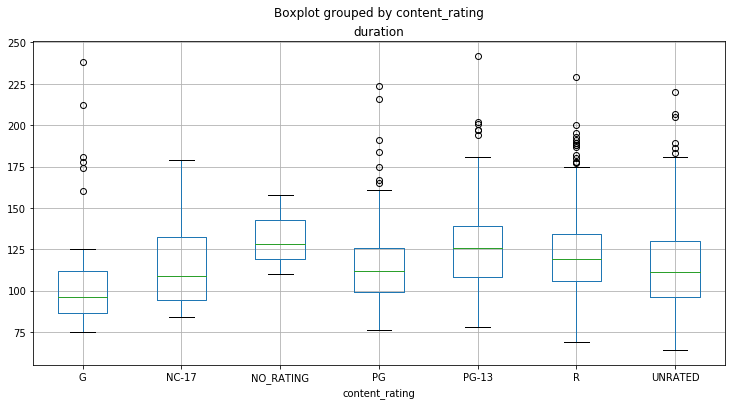

In [91]:
fig, ax = plt.subplots(figsize=(12,6))
movies.boxplot(column='duration', by='content_rating', ax=ax)

#the NO_RATING movies look to be longest, but there does not seem to be a notable relationship between content_rating and 

#### Determine the top rated movie (by star rating) for each genre.

In [81]:
# Answer:
movies.groupby('genre').title.first()
#groupby to isolate genre and .mean() to find the best of each genre

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [118]:
# Answer:
duplicate_titles = movies[movies.title.duplicated()].title
#
movies[movies.title.isin(duplicate_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NO_RATING,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [104]:
# Answer:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [107]:
ten_ratings = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(ten_ratings)].groupby('genre').star_rating.mean()
#use isin to determine which of values above are in the movies dataset and find the mean star_rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [108]:
# Answer:
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()
#instead manually selecting movie geres use the >= to find which has more than 10 ratings

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [109]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]
#isolate using one line of code instead of creating two variables to do so

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [110]:
# Answer:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]
#using the .agg we are able to call the mean and count from the list movies

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!